([<matplotlib.axis.YTick at 0x1c8a9ba8>,
 <a list of 8 Text yticklabel objects>)

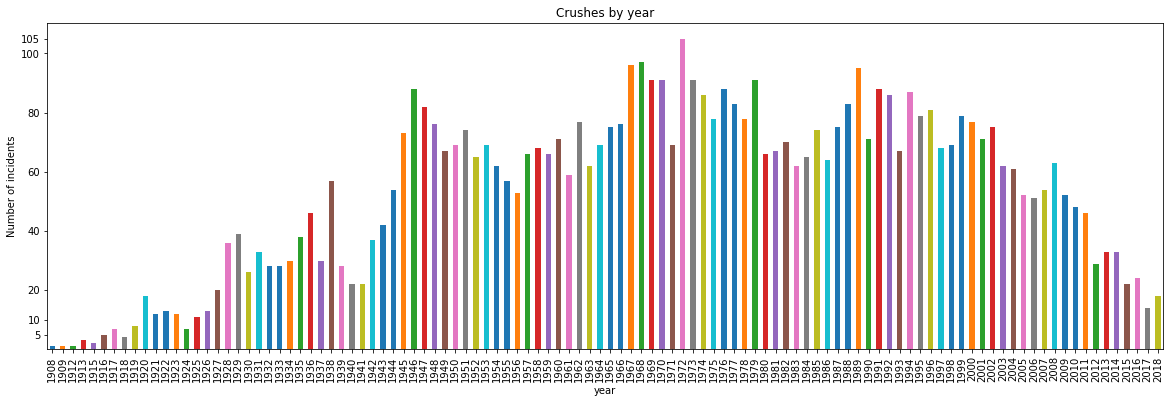

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
os.getcwd()
df = pd.read_csv("planecrashinfo.csv")

#crushes by year
crushes_by_year = pd.to_datetime(df['date']).dt.year
crushes_by_year_grouped = df.groupby([crushes_by_year])
crushes_by_year_grouped['date'].count().plot(kind='bar',figsize=(20,6))
plt.title('Crushes by year')
plt.ylabel('Number of incidents')
plt.xlabel('year')
plt.yticks([5,10,20,40,60,80,100,105])

Text(0, 0.5, 'Number of incidents')

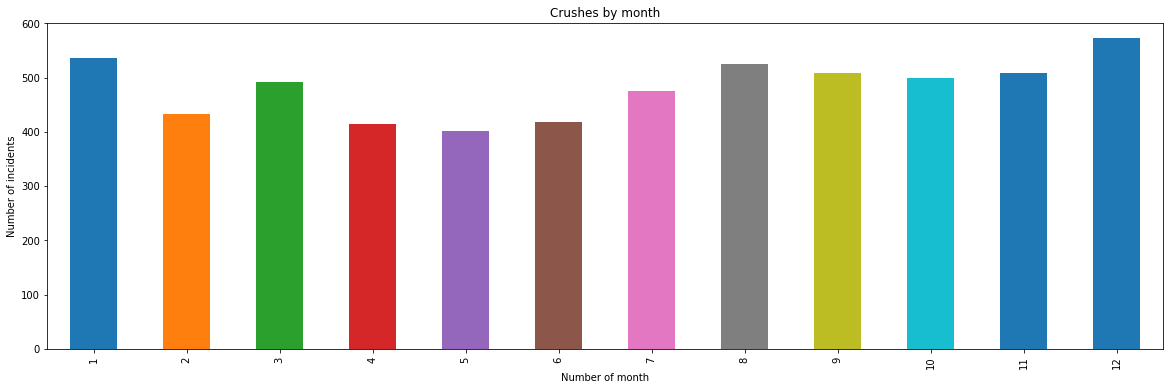

In [112]:
#crushes by month
crushes_by_month = pd.to_datetime(df['date']).dt.month
crushes_by_month_grouped = df.groupby([crushes_by_month])
crushes_by_month_grouped['date'].count().plot(kind='bar',figsize=(20,6))
plt.title('Crushes by month')
plt.xlabel('Number of month')
plt.ylabel('Number of incidents')

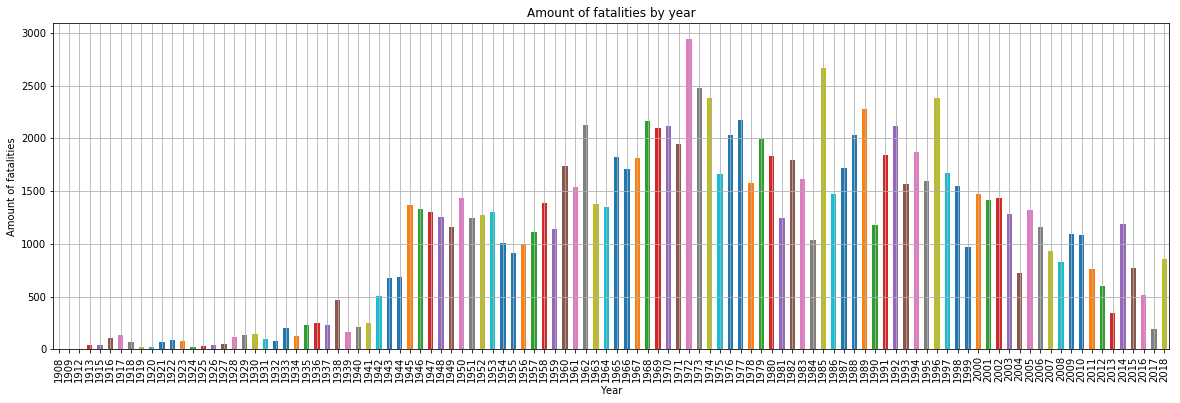

In [113]:
df['fatalities'] = df['fatalities'].replace(r'\(.*?\)','',regex=True)
df['fatalities'] = df['fatalities'].str.replace('\xa0', '')
df['fatalities'] = df['fatalities'].str.replace('?', 'NaN')
df['fatalities'].describe()
for i in range(len(df['fatalities'])):
    df['fatalities'][i] = float(df['fatalities'][i])

#fat by year    
    
fatalities_by_year_grouped = df['fatalities'].groupby([crushes_by_year])
fat_sum_by_year = fatalities_by_year_grouped.sum()
fat_sum_by_year.plot(kind='bar',figsize=(20,6))
plt.title('Amount of fatalities by year')
plt.xlabel('Year')
plt.ylabel('Amount of fatalities')
plt.grid(True)



Fatalities overall: 115122


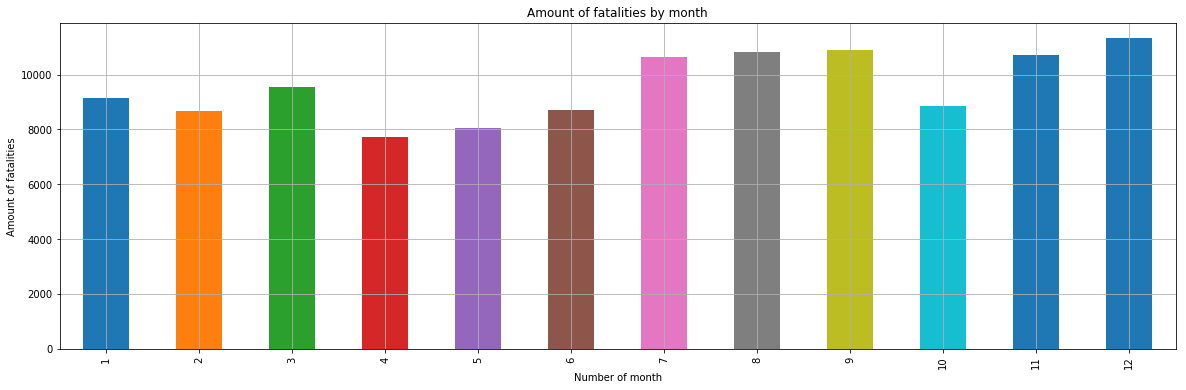

In [153]:
#fat by month

fatalities_by_month_grouped = df['fatalities'].groupby([crushes_by_month])
fat_sum_by_month = fatalities_by_month_grouped.sum()
fat_sum_by_month.plot(kind='bar',figsize=(20,6))
plt.title('Amount of fatalities by month')
plt.xlabel('Number of month')
plt.ylabel('Amount of fatalities')
plt.grid(True)
#fat overall
fat_overall = int(df['fatalities'].sum())
print('Fatalities overall:', fat_overall)


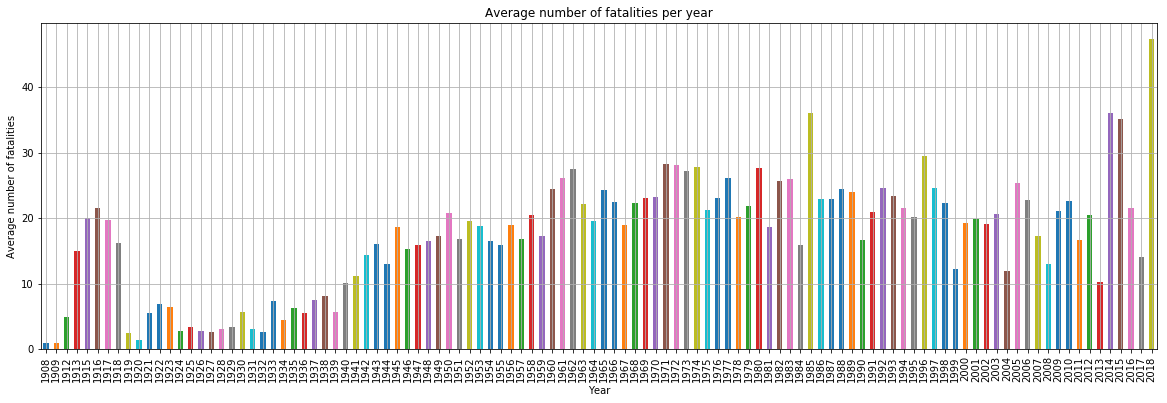

In [163]:
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['fatalities'].groupby([crushes_by_year]).agg(np.mean).plot(kind="bar",figsize=(20,6))
plt.title('Average number of fatalities per year')
plt.xlabel('Year')
plt.ylabel('Average number of fatalities')
plt.grid(True)
